Import Dependency


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from windrose import WindroseAxes
import os


Loade The Data

In [2]:
# Reload the raw dataset to start fresh
df = pd.read_csv('../data/raw/sierraleone-bumbuna.csv')



initial explaratory data analaysis

In [3]:
print("First 10 rows of raw data:")
print(df[['GHI', 'DNI', 'DHI']].head(10))

print("\nRandom sample of 10 rows:")
print(df[['GHI', 'DNI', 'DHI']].sample(10))

# Check how many rows have negative values for each column
for col in ['GHI', 'DNI', 'DHI']:
    negative_count = len(df[df[col] < 0])
    print(f"Number of rows with {col} < 0: {negative_count} ({negative_count / len(df) * 100:.2f}%)")

First 10 rows of raw data:
   GHI  DNI  DHI
0 -0.7 -0.1 -0.8
1 -0.7 -0.1 -0.8
2 -0.7 -0.1 -0.8
3 -0.7  0.0 -0.8
4 -0.7 -0.1 -0.8
5 -0.7 -0.1 -0.8
6 -0.7  0.0 -0.8
7 -0.7  0.0 -0.8
8 -0.7 -0.1 -0.8
9 -0.7 -0.1 -0.8

Random sample of 10 rows:
           GHI    DNI    DHI
246141    -7.4   -0.3   -6.8
31615     -1.9   -0.4   -1.9
58560    436.5  475.7  182.9
450242   185.6   10.0  177.5
355019  1133.0  875.0  271.4
391615    -2.3   -0.5   -2.5
326343   155.7    0.2  153.9
212157    66.3    0.4   66.1
345856    -1.2   -0.3   -1.6
26769    219.1    7.9  213.6
Number of rows with GHI < 0: 261135 (49.68%)
Number of rows with DNI < 0: 266352 (50.68%)
Number of rows with DHI < 0: 263128 (50.06%)


In [4]:
# How many rows do we actually have?
print("Data shape:", df.shape)

# Show summary of selected columns
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())

Data shape: (525600, 19)
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      201.957515     116.376337     113.720571      26.319394   
std       298.495150     218.652659     158.946032       4.398605   
min       -19.500000      -7.800000     -17.900000      12.300000   
25%        -2.800000      -0.300000      -3.800000      23.100000   
50%         0.300000      -0.100000      -0.100000      25.300000   
75%       362.400000     107.000000     224.700000      29.400000   
max      1499.000000     946.000000     892.000000      39.900000   

                  WS  
count  525600.000000  
mean        1.146113  
std         1.239248  
min         0.000000  
25%         0.000000  
50%         0.800000  
75%         2.000000  
max        19.200000  


In [5]:
# Summary statistics of all numeric columns
summary_stats = df.describe()
display(summary_stats)

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


In [6]:
# Missing values count per column
missing_values = df.isna().sum()
display(missing_values)

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [7]:
# Columns with more than 5% missing values
missing_percent = (missing_values / len(df)) * 100
cols_over_5pct_null = missing_percent[missing_percent > 5]
print("Columns with >5% missing values:")
print(cols_over_5pct_null)

Columns with >5% missing values:
Comments    100.0
dtype: float64


pre-proccesing

In [8]:
# Drop columns with more than 5% missing values
df = df.drop(columns=["Comments"])

In [9]:
# set negative value to 0
irr_cols = ['GHI', 'DNI', 'DHI']
for col in irr_cols:
    df[col] = df[col].clip(lower=0)  # Set negative values to 0
    print(f"After clipping, number of rows with {col} < 0: {len(df[df[col] < 0])}")

After clipping, number of rows with GHI < 0: 0
After clipping, number of rows with DNI < 0: 0
After clipping, number of rows with DHI < 0: 0


In [10]:
#Convert Timestamp to datetime and set as index
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

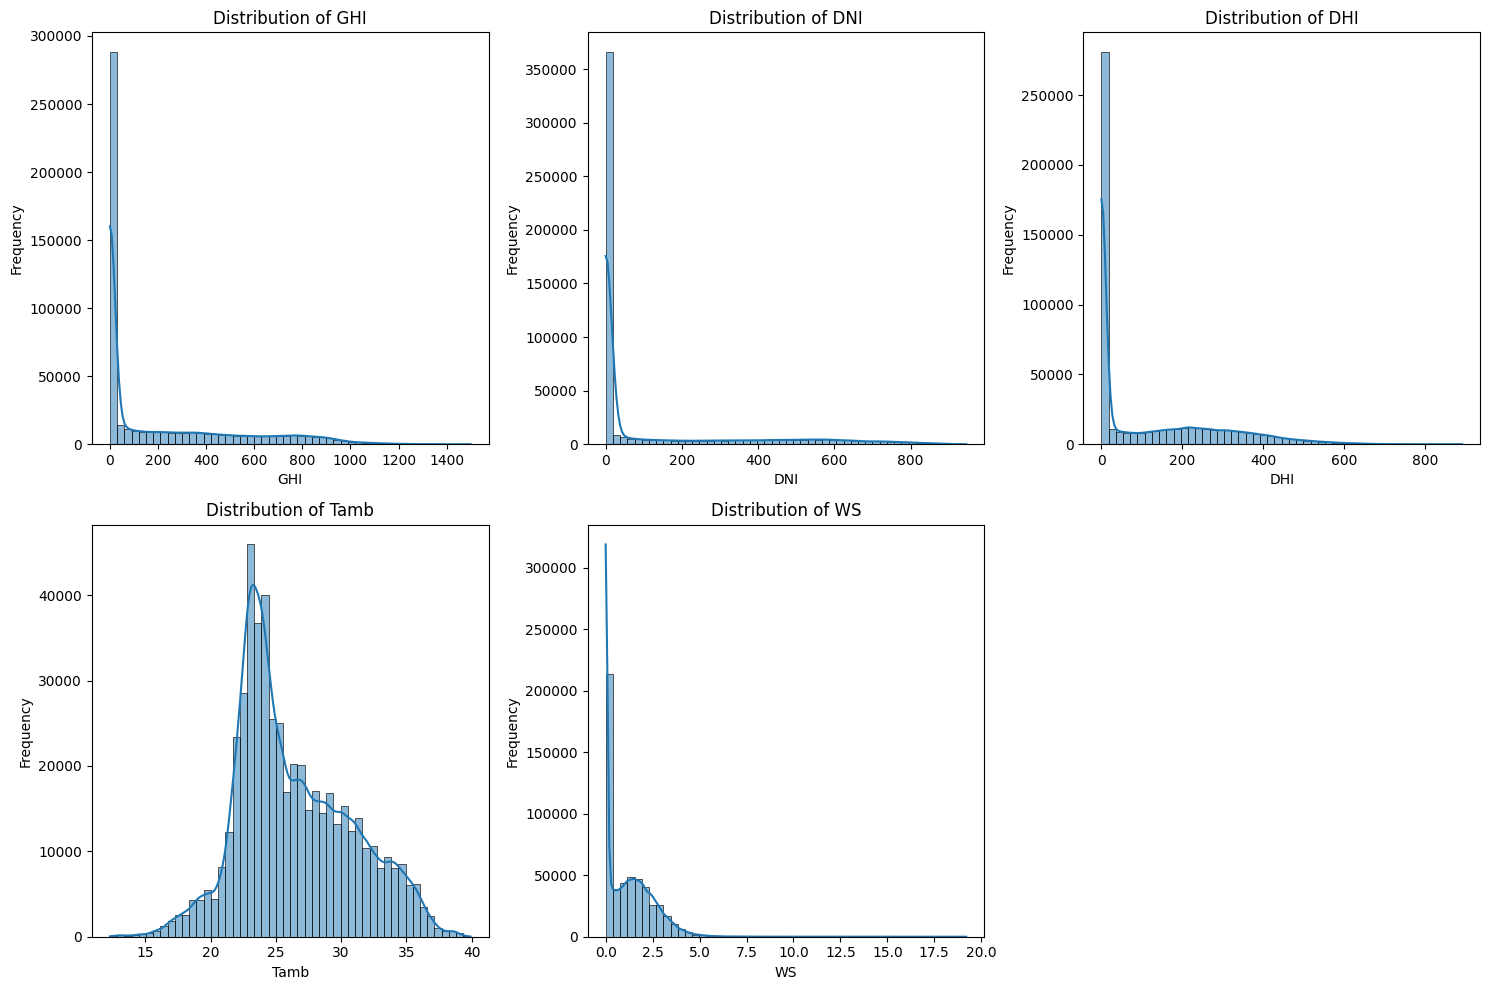

In [11]:


# Set up a grid for plots
cols_to_check = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS']
plt.figure(figsize=(15, 10))

for i, col in enumerate(cols_to_check):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [12]:

# Define key columns for outlier detection
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Detect and handle outliers using Z-scores
for col in key_cols:
    if col in df.columns:
        # Calculate Z-scores, ignoring NaN
        z_scores = stats.zscore(df[col].dropna())
        # Create a mask for outliers (|Z| > 3)
        outlier_mask = abs(z_scores) > 3
        # Get the original indices of outliers
        outlier_indices = df.index[np.where(outlier_mask)[0]]
        print(f"Number of outliers for {col}: {len(outlier_indices)}")
        # Impute outliers with the median (only for non-NaN values)
        df.loc[outlier_indices, col] = df[col].median()

# Verify the shape and summary statistics after outlier handling
print("\nData shape after outlier handling:", df.shape)
print("\nSummary Statistics after outlier handling:")
print(df[['GHI', 'DNI', 'DHI', 'Tamb', 'WS']].describe())

Number of outliers for GHI: 2574
Number of outliers for DNI: 7594
Number of outliers for DHI: 3202
Number of outliers for ModA: 1604
Number of outliers for ModB: 2041
Number of outliers for WS: 3967
Number of outliers for WSgust: 3665

Data shape after outlier handling: (525600, 17)

Summary Statistics after outlier handling:
                 GHI            DNI            DHI           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      198.689042     104.664299     112.421189      26.319394   
std       289.287405     201.602546     151.955609       4.398605   
min         0.000000       0.000000       0.000000      12.300000   
25%         0.000000       0.000000       0.000000      23.100000   
50%         0.300000       0.000000       0.000000      25.300000   
75%       353.500000      75.400000     220.100000      29.400000   
max      1094.000000     772.200000     587.300000      39.900000   

                  WS  
count  525600.000000  
mean

Visiolazation

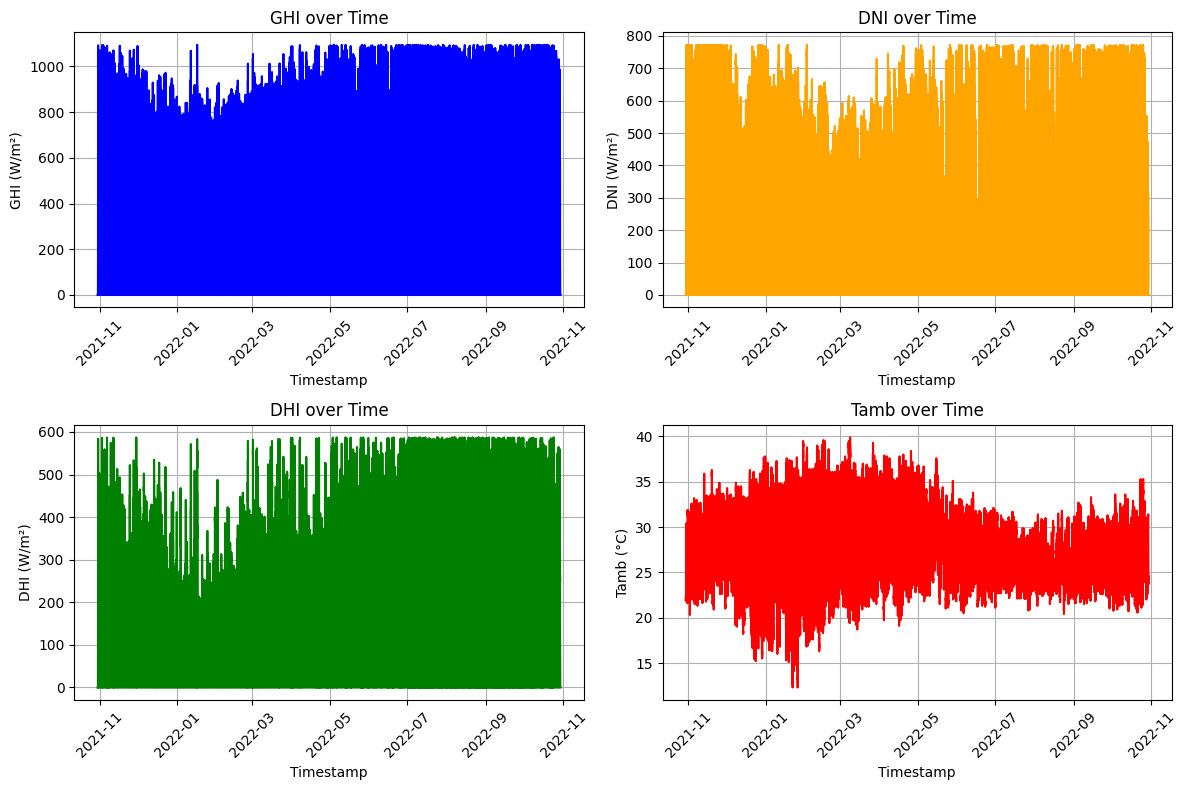

In [13]:

# Plot line charts for GHI, DNI, DHI, and Tamb over time
plt.figure(figsize=(12, 8))

# Plot GHI
plt.subplot(2, 2, 1)
plt.plot(df.index, df['GHI'], label='GHI', color='blue')
plt.title('GHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DNI
plt.subplot(2, 2, 2)
plt.plot(df.index, df['DNI'], label='DNI', color='orange')
plt.title('DNI over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot DHI
plt.subplot(2, 2, 3)
plt.plot(df.index, df['DHI'], label='DHI', color='green')
plt.title('DHI over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI (W/m²)')
plt.xticks(rotation=45)
plt.grid(True)

# Plot Tamb
plt.subplot(2, 2, 4)
plt.plot(df.index, df['Tamb'], label='Tamb', color='red')
plt.title('Tamb over Time')
plt.xlabel('Timestamp')
plt.ylabel('Tamb (°C)')
plt.xticks(rotation=45)
plt.grid(True)

# Adjust layout to avoid overlap
plt.tight_layout()
plt.savefig('notebooks/sierraleone/timeseries_plots.png')
plt.show()

In [14]:
# Analyze patterns by month
monthly_avg = df.groupby(df.index.month)[['GHI', 'DNI', 'DHI', 'Tamb']].mean()
print("Monthly Averages:\n", monthly_avg)

Monthly Averages:
                   GHI         DNI         DHI       Tamb
Timestamp                                               
1          202.626573  166.689615   83.843849  25.329689
2          225.364196  147.226314  113.431265  27.185801
3          235.785356  129.591183  131.241759  28.359635
4          240.158882  144.575021  119.815285  28.747725
5          200.472095   96.871190  122.411960  27.282619
6          191.764405   84.948620  119.457188  25.957787
7          158.072099   46.078481  120.182343  25.114666
8          144.218510   30.361396  112.962375  24.728138
9          176.408146   54.116285  120.399667  25.398345
10         195.446691   87.577146  115.490500  25.487047
11         218.260745  119.180780   96.195711  26.488898
12         199.299245  152.363611   93.919568  25.878651


In [15]:
# Analyze patterns by hour of the day
hourly_avg = df.groupby(df.index.hour)[['GHI', 'DNI', 'DHI']].mean()
print("\nHourly Averages:\n", hourly_avg)

# Look for anomalies (e.g., GHI spikes)
ghi_spikes = df[df['GHI'] > df['GHI'].quantile(0.99)]  # Top 1% of GHI values
print("\nPotential GHI Anomalies (Spikes):\n", ghi_spikes[['GHI']])


Hourly Averages:
                   GHI         DNI         DHI
Timestamp                                    
0            0.000447    0.000297    0.000548
1            0.000073    0.000210    0.000046
2            0.000037    0.000584    0.000000
3            0.000731    0.000881    0.000000
4            0.000151    0.000374    0.000000
5            0.000580    0.000963    0.000000
6            2.384078    0.110324    2.255333
7           57.444078   25.067598   51.151918
8          206.812589  124.108553  155.366877
9          383.178890  210.580840  252.005977
10         541.150055  269.432927  314.713041
11         633.995484  286.827475  334.972361
12         663.366630  300.122785  336.592808
13         661.776877  309.864580  336.923050
14         618.266598  313.434315  319.892521
15         497.107913  293.567963  267.772132
16         325.476498  236.601297  194.651306
17         150.336379  123.623680  108.388950
18          27.060046   18.594123   23.273146
19           0.

Average ModA and ModB by Cleaning Flag:
                 ModA        ModB
Cleaning                        
0         202.986954  193.639074
1         273.309252  277.231102


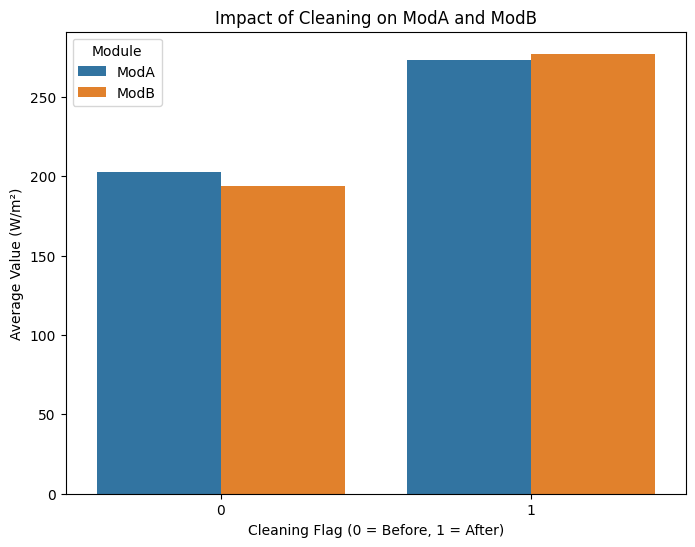

In [16]:


# Group by Cleaning flag and calculate mean for ModA and ModB
cleaning_impact = df.groupby('Cleaning')[['ModA', 'ModB']].mean()
print("Average ModA and ModB by Cleaning Flag:\n", cleaning_impact)

# Plot the impact of cleaning on ModA and ModB
cleaning_impact_melted = cleaning_impact.reset_index().melt(id_vars='Cleaning', value_vars=['ModA', 'ModB'], var_name='Module', value_name='Value')
plt.figure(figsize=(8, 6))
sns.barplot(x='Cleaning', y='Value', hue='Module', data=cleaning_impact_melted)
plt.title('Impact of Cleaning on ModA and ModB')
plt.xlabel('Cleaning Flag (0 = Before, 1 = After)')
plt.ylabel('Average Value (W/m²)')
plt.savefig('notebooks/sierraleone/cleaning_impact_plot.png')
plt.show()

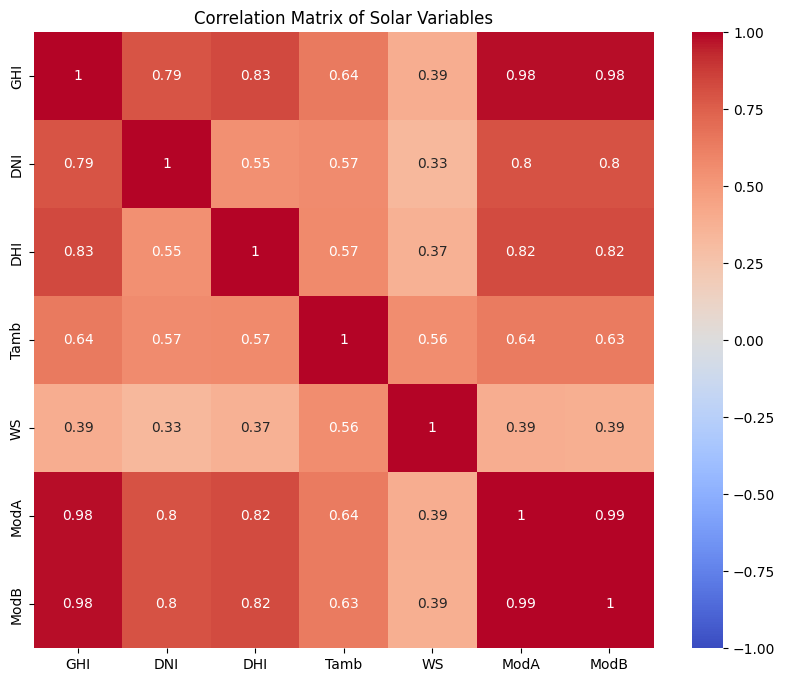

Correlation Matrix:
            GHI       DNI       DHI      Tamb        WS      ModA      ModB
GHI   1.000000  0.794347  0.830046  0.641715  0.394473  0.977404  0.976849
DNI   0.794347  1.000000  0.546211  0.569717  0.329363  0.804113  0.800686
DHI   0.830046  0.546211  1.000000  0.573089  0.371719  0.822342  0.820602
Tamb  0.641715  0.569717  0.573089  1.000000  0.561103  0.638136  0.634872
WS    0.394473  0.329363  0.371719  0.561103  1.000000  0.390761  0.388744
ModA  0.977404  0.804113  0.822342  0.638136  0.390761  1.000000  0.993026
ModB  0.976849  0.800686  0.820602  0.634872  0.388744  0.993026  1.000000


In [17]:
# Select columns for correlation analysis
correlation_cols = ['GHI', 'DNI', 'DHI', 'Tamb', 'WS', 'ModA', 'ModB']

# Compute correlation matrix
correlation_matrix = df[correlation_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Solar Variables')
plt.savefig('notebooks/sierraleone/correlation_heatmap.png')
plt.show()

print("Correlation Matrix:\n", correlation_matrix)

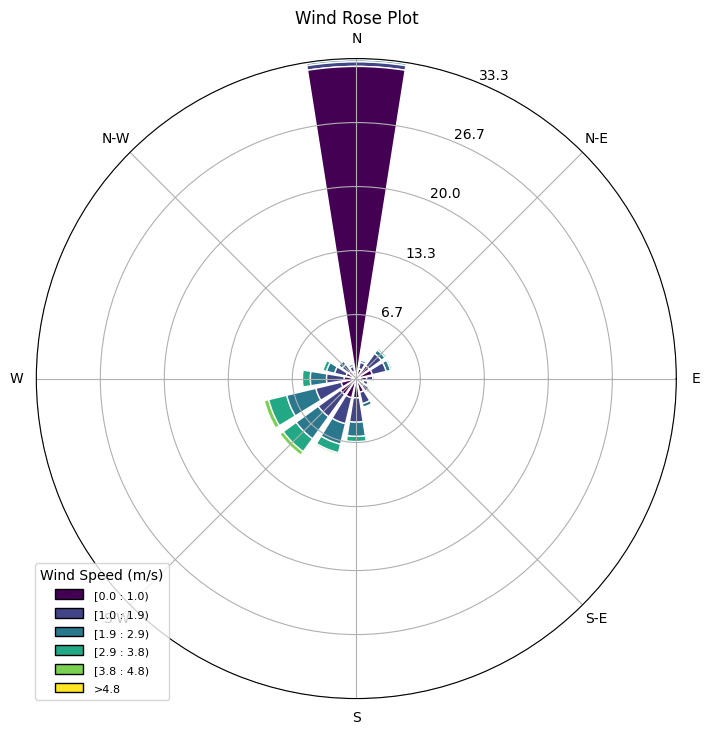

In [18]:


# Create wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend(title="Wind Speed (m/s)")
plt.title('Wind Rose Plot')

# Create notebooks directory if it doesn't exist
os.makedirs('notebooks', exist_ok=True)
plt.savefig('notebooks/sierraleone/wind_rose_plot.png')
plt.show()

In [19]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('../data/cleaned/sierraleone_cleaned.csv', index=True)
print("Cleaned dataset saved to 'data/sierraleone_cleaned.csv'")

Cleaned dataset saved to 'data/sierraleone_cleaned.csv'
